In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/demand_history.csv", parse_dates=["date"])
df.head()

,date,sku,units_sold
0,2024-01-01,USB_C_CABLE,34
1,2024-01-02,USB_C_CABLE,42
2,2024-01-03,USB_C_CABLE,56
3,2024-01-04,USB_C_CABLE,41
4,2024-01-05,USB_C_CABLE,54


In [2]:
daily_demand = (
    df.groupby("date")["units_sold"]
    .sum()
    .reset_index()
)

daily_demand.head()

,date,units_sold
0,2024-01-01,185
1,2024-01-02,187
2,2024-01-03,211
3,2024-01-04,177
4,2024-01-05,191


In [6]:
train_size = int(len(daily_demand) * 0.8)

train = daily_demand.iloc[:train_size].copy()
test = daily_demand.iloc[train_size:].copy()

train.tail(), test.head()

(          date  units_sold
 287 2024-10-14         208
 288 2024-10-15         206
 289 2024-10-16         183
 290 2024-10-17         209
 291 2024-10-18         201,
           date  units_sold
 292 2024-10-19         258
 293 2024-10-20         249
 294 2024-10-21         203
 295 2024-10-22         206
 296 2024-10-23         212)

In [7]:
test = test.copy()
test["naive_forecast"] = train["units_sold"].iloc[-1]

In [8]:
window = 7
train["ma_forecast"] = train["units_sold"].rolling(window).mean()

last_ma = train["ma_forecast"].iloc[-1]
test["ma_forecast"] = last_ma

In [9]:
def mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [10]:
naive_mape = mape(test["units_sold"], test["naive_forecast"])
ma_mape = mape(test["units_sold"], test["ma_forecast"])

naive_mape, ma_mape

(25.26998376099202, 19.892840665493043)

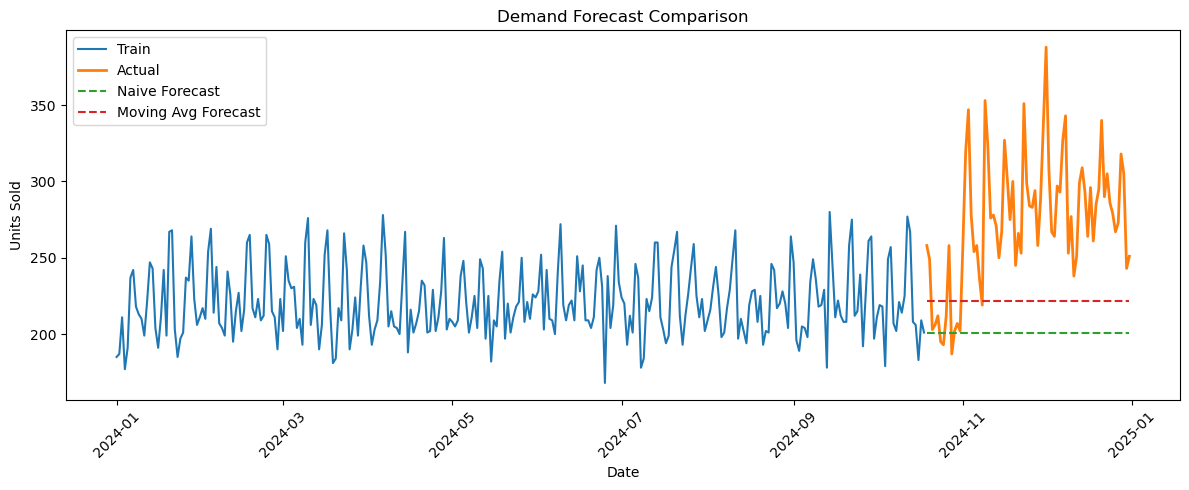

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train["date"], train["units_sold"], label="Train")
plt.plot(test["date"], test["units_sold"], label="Actual", linewidth=2)
plt.plot(test["date"], test["naive_forecast"], label="Naive Forecast", linestyle="--")
plt.plot(test["date"], test["ma_forecast"], label="Moving Avg Forecast", linestyle="--")

plt.title("Demand Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
forecast_results = pd.DataFrame({
    "Model": ["Naive", "7-Day Moving Average"],
    "MAPE (%)": [round(naive_mape, 2), round(ma_mape, 2)]
})

forecast_results

,Model,MAPE (%)
0,Naive,25.27
1,7-Day Moving Average,19.89
